In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
constant_patch = '11.23.1'

# 라이엇 개발자 페이지에서 최신 버전 한국 서버 챔피언 정보 가져오기
champion_info = requests.get("http://ddragon.leagueoflegends.com/cdn/" + constant_patch + "/data/ko_KR/champion.json").json()     

In [4]:
# 챔피언 정보 => DataFrame으로 변환
# champion_df는 'key'로 id값, 'name'으로 챔피언 한국어 이름을 가지는 156rows짜리 DataFrame
champion_df = pd.DataFrame(champion_info['data']).T[['key', 'name']]

# champion_df의 'key' column string => numeric 변환
champion_df['key'] = pd.to_numeric(champion_df['key'])

In [5]:
df = pd.read_csv('BIPA_data.csv', index_col=0)

In [6]:
df = df.merge(champion_df, how = 'left', left_on = 'championId', right_on = 'key')

In [7]:
data = pd.DataFrame()
data = df[['tierRank', 'position', 'name', 'result']]

In [8]:
# 결측치 드랍
data = data.dropna(axis=0)
# 다시하기 드랍
data.drop(data.loc[data['result']=='UNKNOWN'].index, inplace=True)
print('data : ', len(data))

data :  963577


In [9]:
# result 숫자로 변환
data.loc[data['result'] == 'WIN', 'result'] = 1
data.loc[data['result'] == 'LOSE', 'result'] = 0
data['games'] = 1
data = data.astype({'result' : 'int'})
# result -> wins로 컬럼명 변경
data.rename(columns = {'result':'wins'},inplace=True)

In [10]:
# 티어별 데이터 프레임 생성
TierList = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND',
        'MASTER', 'GRAND_MASTER','CHALLENGER']
TierFront = ['I', 'B', 'S', 'G', 'P', 'D', 'M', 'G', 'C']

for i, j in zip(TierList, TierFront) :
    globals()[f'{i}'] = data[data['tierRank'].str.contains(f'{j}')]

m_list = ['M', 'R', 'C']
m_list = '|'.join(m_list)
ABOVE_MASTER = data[data['tierRank'].str.contains(m_list)]
print('MASTER+ : ', len(ABOVE_MASTER))

print('SUM : ', len(IRON)+len(BRONZE)+len(SILVER)+len(GOLD)+len(PLATINUM)+len(DIAMOND)+len(ABOVE_MASTER))

MASTER+ :  3876
SUM :  963577


In [11]:
# 티어별-포지션별 승률, 픽률

IRON_total = IRON.groupby(['position', 'name'], as_index=False).sum()
IRON_sum = IRON.groupby(['position'], as_index=False).sum()
IRON_sum.columns = ['position', 'wins', 'total_games']
IRON_sum = IRON_sum[['position', 'total_games']]
IRON_total = IRON_total.merge(IRON_sum, how = 'left', on = 'position')
IRON_total = IRON_total[IRON_total.games > 50]
IRON_total['winRate'] = IRON_total['wins'] / IRON_total['games']
IRON_total['pickRate'] = IRON_total['games'] / IRON_total['total_games']
IRON_total = IRON_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

BRONZE_total = BRONZE.groupby(['position', 'name'], as_index=False).sum()
BRONZE_sum = BRONZE.groupby(['position'], as_index=False).sum()
BRONZE_sum.columns = ['position', 'wins', 'total_games']
BRONZE_sum = BRONZE_sum[['position', 'total_games']]
BRONZE_total = BRONZE_total.merge(BRONZE_sum, how = 'left', on = 'position')
BRONZE_total = BRONZE_total[BRONZE_total.games > 50]
BRONZE_total['winRate'] = BRONZE_total['wins'] / BRONZE_total['games']
BRONZE_total['pickRate'] = BRONZE_total['games'] / BRONZE_total['total_games']
BRONZE_total = BRONZE_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

SILVER_total = SILVER.groupby(['position', 'name'], as_index=False).sum()
SILVER_sum = SILVER.groupby(['position'], as_index=False).sum()
SILVER_sum.columns = ['position', 'wins', 'total_games']
SILVER_sum = SILVER_sum[['position', 'total_games']]
SILVER_total = SILVER_total.merge(SILVER_sum, how = 'left', on = 'position')
SILVER_total = SILVER_total[SILVER_total.games > 50]
SILVER_total['winRate'] = SILVER_total['wins'] / SILVER_total['games']
SILVER_total['pickRate'] = SILVER_total['games'] / SILVER_total['total_games']
SILVER_total = SILVER_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

GOLD_total = GOLD.groupby(['position', 'name'], as_index=False).sum()
GOLD_sum = GOLD.groupby(['position'], as_index=False).sum()
GOLD_sum.columns = ['position', 'wins', 'total_games']
GOLD_sum = GOLD_sum[['position', 'total_games']]
GOLD_total = GOLD_total.merge(GOLD_sum, how = 'left', on = 'position')
GOLD_total = GOLD_total[GOLD_total.games > 50]
GOLD_total['winRate'] = GOLD_total['wins'] / GOLD_total['games']
GOLD_total['pickRate'] = GOLD_total['games'] / GOLD_total['total_games']
GOLD_total = GOLD_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

PLATINUM_total = PLATINUM.groupby(['position', 'name'], as_index=False).sum()
PLATINUM_sum = PLATINUM.groupby(['position'], as_index=False).sum()
PLATINUM_sum.columns = ['position', 'wins', 'total_games']
PLATINUM_sum = PLATINUM_sum[['position', 'total_games']]
PLATINUM_total = PLATINUM_total.merge(PLATINUM_sum, how = 'left', on = 'position')
PLATINUM_total = PLATINUM_total[PLATINUM_total.games > 50]
PLATINUM_total['winRate'] = PLATINUM_total['wins'] / PLATINUM_total['games']
PLATINUM_total['pickRate'] = PLATINUM_total['games'] / PLATINUM_total['total_games']
PLATINUM_total = PLATINUM_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

DIAMOND_total = DIAMOND.groupby(['position', 'name'], as_index=False).sum()
DIAMOND_sum = DIAMOND.groupby(['position'], as_index=False).sum()
DIAMOND_sum.columns = ['position', 'wins', 'total_games']
DIAMOND_sum = DIAMOND_sum[['position', 'total_games']]
DIAMOND_total = DIAMOND_total.merge(DIAMOND_sum, how = 'left', on = 'position')
DIAMOND_total = DIAMOND_total[DIAMOND_total.games > 50]
DIAMOND_total['winRate'] = DIAMOND_total['wins'] / DIAMOND_total['games']
DIAMOND_total['pickRate'] = DIAMOND_total['games'] / DIAMOND_total['total_games']
DIAMOND_total = DIAMOND_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

MASTER_total = MASTER.groupby(['position', 'name'], as_index=False).sum()
MASTER_sum = MASTER.groupby(['position'], as_index=False).sum()
MASTER_sum.columns = ['position', 'wins', 'total_games']
MASTER_sum = MASTER_sum[['position', 'total_games']]
MASTER_total = MASTER_total.merge(MASTER_sum, how = 'left', on = 'position')
MASTER_total['winRate'] = MASTER_total['wins'] / MASTER_total['games']
MASTER_total['pickRate'] = MASTER_total['games'] / MASTER_total['total_games']
MASTER_total = MASTER_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

GRAND_MASTER_total = GRAND_MASTER.groupby(['position', 'name'], as_index=False).sum()
GRAND_MASTER_sum = GRAND_MASTER.groupby(['position'], as_index=False).sum()
GRAND_MASTER_sum.columns = ['position', 'wins', 'total_games']
GRAND_MASTER_sum = GRAND_MASTER_sum[['position', 'total_games']]
GRAND_MASTER_total = GRAND_MASTER_total.merge(GRAND_MASTER_sum, how = 'left', on = 'position')
GRAND_MASTER_total['winRate'] = GRAND_MASTER_total['wins'] / GRAND_MASTER_total['games']
GRAND_MASTER_total['pickRate'] = GRAND_MASTER_total['games'] / GRAND_MASTER_total['total_games']
GRAND_MASTER_total = GRAND_MASTER_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

CHALLENGER_total = CHALLENGER.groupby(['position', 'name'], as_index=False).sum()
CHALLENGER_sum = CHALLENGER.groupby(['position'], as_index=False).sum()
CHALLENGER_sum.columns = ['position', 'wins', 'total_games']
CHALLENGER_sum = CHALLENGER_sum[['position', 'total_games']]
CHALLENGER_total = CHALLENGER_total.merge(CHALLENGER_sum, how = 'left', on = 'position')
CHALLENGER_total['winRate'] = CHALLENGER_total['wins'] / CHALLENGER_total['games']
CHALLENGER_total['pickRate'] = CHALLENGER_total['games'] / CHALLENGER_total['total_games']
CHALLENGER_total = CHALLENGER_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

ABOVE_MASTER_total = ABOVE_MASTER.groupby(['position', 'name'], as_index=False).sum()
ABOVE_MASTER_sum = ABOVE_MASTER.groupby(['position'], as_index=False).sum()
ABOVE_MASTER_sum.columns = ['position', 'wins', 'total_games']
ABOVE_MASTER_sum = ABOVE_MASTER_sum[['position', 'total_games']]
ABOVE_MASTER_total = ABOVE_MASTER_total.merge(ABOVE_MASTER_sum, how = 'left', on = 'position')
ABOVE_MASTER_total = ABOVE_MASTER_total[ABOVE_MASTER_total.games > 50]
ABOVE_MASTER_total['winRate'] = ABOVE_MASTER_total['wins'] / ABOVE_MASTER_total['games']
ABOVE_MASTER_total['pickRate'] = ABOVE_MASTER_total['games'] / ABOVE_MASTER_total['total_games']
ABOVE_MASTER_total = ABOVE_MASTER_total.sort_values(by=['position', 'winRate', 'pickRate'], ascending=False) 

In [12]:
GOLD_TOP = GOLD_total[GOLD_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(20)
GOLD_JUG = GOLD_total[GOLD_total['position'] == 'J'].sort_values(by=['pickRate'], ascending=False).head(20)
GOLD_MID = GOLD_total[GOLD_total['position'] == 'M'].sort_values(by=['pickRate'], ascending=False).head(20)
GOLD_AD = GOLD_total[GOLD_total['position'] == 'A'].sort_values(by=['pickRate'], ascending=False).head(20)
GOLD_SUP = GOLD_total[GOLD_total['position'] == 'S'].sort_values(by=['pickRate'], ascending=False).head(20)

In [13]:
# IRON_TOP = IRON_total[IRON_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# BRONZE_TOP = BRONZE_total[BRONZE_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# SILVER_TOP = SILVER_total[SILVER_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# GOLD_TOP = GOLD_total[GOLD_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# PLATINUM_TOP = PLATINUM_total[PLATINUM_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# DIAMOND_TOP = DIAMOND_total[DIAMOND_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# MASTER_TOP = MASTER_total[MASTER_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# GRAND_MASTER_TOP = GRAND_MASTER_total[GRAND_MASTER_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# CHALLENGER_TOP = CHALLENGER_total[CHALLENGER_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)
# ABOVE_MASTER_TOP = ABOVE_MASTER_total[ABOVE_MASTER_total['position'] == 'T'].sort_values(by=['pickRate'], ascending=False).head(10)

In [14]:
P = ['T','J', 'M','A','S']
line = ['TOP', 'JUG', 'MID', 'AD', 'SUP']
tier = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRAND_MASTER','CHALLENGER', 'ABOVE_MASTER']
for i in tier:
    for j, k in zip(line, P):
        a = globals()[f'{i}_total']
        globals()[f'{i}_{j}'] = a[a['position'] == f'{k}'].sort_values(by=['pickRate'], ascending=False).head(10)

In [15]:
data = pd.read_csv('json_champ.csv', index_col=0)

In [16]:
json_champ = data.merge(champion_df, how = 'left', left_on = 'championId', right_on = 'key')

In [17]:
json_champ

,name_x,style,difficulty,damageType,damage,durability,crowdControl,mobility,utility,roles,key,name_y
0,Gwen,5,2,kMagic,3,2,1,3,1,"['fighter', 'assassin']",887,그웬
1,Lillia,8,3,kMagic,3,1,2,2,2,"['fighter', 'mage']",876,릴리아
2,Sett,4,2,kPhysical,2,2,2,2,1,"['fighter', 'tank']",875,세트
3,Yone,5,3,kMixed,3,1,2,3,1,"['assassin', 'fighter']",777,요네
4,Vex,9,2,kMagic,3,2,2,2,1,['mage'],711,벡스
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Xin Zhao,4,1,kPhysical,2,2,2,2,1,"['fighter', 'assassin']",5,신 짜오
153,Twisted Fate,7,2,kMagic,3,1,2,2,2,['mage'],4,트위스티드 페이트
154,Galio,10,2,kMagic,2,3,3,2,1,"['tank', 'mage']",3,갈리오
155,Olaf,4,2,kPhysical,2,2,2,1,1,"['fighter', 'tank']",2,올라프


In [18]:
json_champ['name_x'] = json_champ['name_y']

In [19]:
json_champ = json_champ.iloc[:,0:11]

In [20]:
json_champ

,name_x,style,difficulty,damageType,damage,durability,crowdControl,mobility,utility,roles,key
0,그웬,5,2,kMagic,3,2,1,3,1,"['fighter', 'assassin']",887
1,릴리아,8,3,kMagic,3,1,2,2,2,"['fighter', 'mage']",876
2,세트,4,2,kPhysical,2,2,2,2,1,"['fighter', 'tank']",875
3,요네,5,3,kMixed,3,1,2,3,1,"['assassin', 'fighter']",777
4,벡스,9,2,kMagic,3,2,2,2,1,['mage'],711
...,...,...,...,...,...,...,...,...,...,...,...
152,신 짜오,4,1,kPhysical,2,2,2,2,1,"['fighter', 'assassin']",5
153,트위스티드 페이트,7,2,kMagic,3,1,2,2,2,['mage'],4
154,갈리오,10,2,kMagic,2,3,3,2,1,"['tank', 'mage']",3
155,올라프,4,2,kPhysical,2,2,2,1,1,"['fighter', 'tank']",2


In [21]:
json_champ

,name_x,style,difficulty,damageType,damage,durability,crowdControl,mobility,utility,roles,key
0,그웬,5,2,kMagic,3,2,1,3,1,"['fighter', 'assassin']",887
1,릴리아,8,3,kMagic,3,1,2,2,2,"['fighter', 'mage']",876
2,세트,4,2,kPhysical,2,2,2,2,1,"['fighter', 'tank']",875
3,요네,5,3,kMixed,3,1,2,3,1,"['assassin', 'fighter']",777
4,벡스,9,2,kMagic,3,2,2,2,1,['mage'],711
...,...,...,...,...,...,...,...,...,...,...,...
152,신 짜오,4,1,kPhysical,2,2,2,2,1,"['fighter', 'assassin']",5
153,트위스티드 페이트,7,2,kMagic,3,1,2,2,2,['mage'],4
154,갈리오,10,2,kMagic,2,3,3,2,1,"['tank', 'mage']",3
155,올라프,4,2,kPhysical,2,2,2,1,1,"['fighter', 'tank']",2


In [22]:
# IRON_TOP = IRON_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# BRONZE_TOP = BRONZE_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# SILVER_TOP = SILVER_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# GOLD_TOP = GOLD_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# PLATINUM_TOP = IRON_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# DIAMOND_TOP = IRON_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# MASTER_TOP = IRON_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# GRAND_MASTER_TOP = IRON_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# CHALLENGER_TOP = CHALLENGER_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
# ABOVE_MASTER_TOP = ABOVE_MASTER_TOP.merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')

In [23]:
IRON_TOP['weighted'] = IRON_TOP['pickRate']/IRON_TOP['pickRate'].sum()

In [24]:
line = ['TOP', 'JUG', 'MID', 'AD', 'SUP']
tier = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRAND_MASTER','CHALLENGER', 'ABOVE_MASTER']
value = ['difficulty','damage', 'durability', 'crowdControl', 'mobility', 'utility']
for j in line:
    for i in tier:
        globals()[f'{i}_{j}']['weighted'] = globals()[f'{i}_{j}']['pickRate']/globals()[f'{i}_{j}']['pickRate'].sum()

In [25]:
IRON_TOP

,position,name,wins,games,total_games,winRate,pickRate,weighted
428,T,세트,126,251,1885,0.501992,0.133156,0.260644
393,T,다리우스,46,94,1885,0.489362,0.049867,0.097612
383,T,가렌,45,94,1885,0.478723,0.049867,0.097612
399,T,레넥톤,39,84,1885,0.464286,0.044562,0.087227
453,T,이렐리아,35,84,1885,0.416667,0.044562,0.087227
445,T,오른,37,80,1885,0.462500,0.042440,0.083074
439,T,아트록스,33,74,1885,0.445946,0.039257,0.076843
409,T,말파이트,37,69,1885,0.536232,0.036605,0.071651
410,T,모데카이저,37,69,1885,0.536232,0.036605,0.071651
424,T,사일러스,27,64,1885,0.421875,0.033952,0.066459


In [26]:
line = ['TOP', 'JUG', 'MID', 'AD', 'SUP']
tier = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRAND_MASTER','CHALLENGER', 'ABOVE_MASTER']
for j in line:
    for i in tier:
        globals()[f'{i}_{j}'] = globals()[f'{i}_{j}'].merge(json_champ, how = 'left', left_on = 'name', right_on = 'name_x')
        

In [27]:
# IRON_TOP_mean = IRON_TOP.mean()[5:12]
# BRONZE_TOP_mean = BRONZE_TOP.mean()[5:12]
# SILVER_TOP_mean = SILVER_TOP.mean()[5:12]
# GOLD_TOP_mean = GOLD_TOP.mean()[5:12]
# PLATINUM_TOP_mean = PLATINUM_TOP.mean()[5:12]
# DIAMOND_TOP_mean = DIAMOND_TOP.mean()[5:12]
# MASTER_TOP_mean = MASTER_TOP.mean()[5:12]
# GRAND_MASTER_TOP_mean = GRAND_MASTER_TOP.mean()[5:12]
# CHALLENGER_TOP_mean = CHALLENGER_TOP.mean()[5:12]
# ABOVE_MASTER_TOP_mean = ABOVE_MASTER_TOP.mean()[5:12]

In [28]:
ABOVE_MASTER_SUP

,position,name,wins,games,total_games,winRate,pickRate,weighted,name_x,style,difficulty,damageType,damage,durability,crowdControl,mobility,utility,roles,key
0,S,쓰레쉬,51,98,811,0.520408,0.120838,0.294294,쓰레쉬,8,3,kMagic,1,2,3,1,3,"['support', 'fighter']",412
1,S,레오나,39,69,811,0.565217,0.085080,0.207207,레오나,9,1,kMagic,1,3,3,1,1,"['tank', 'support']",89
2,S,카르마,29,60,811,0.483333,0.073983,0.180180,카르마,10,1,kMagic,2,1,2,1,2,"['mage', 'support']",43
3,S,트런들,28,55,811,0.509091,0.067818,0.165165,트런들,3,1,kPhysical,2,3,1,1,2,"['fighter', 'tank']",48
4,S,룰루,28,51,811,0.549020,0.062885,0.153153,룰루,8,2,kMagic,2,1,2,1,3,"['support', 'mage']",117


In [29]:
a = []
line = ['TOP', 'JUG', 'MID', 'AD', 'SUP']
tier = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRAND_MASTER','CHALLENGER', 'ABOVE_MASTER']
value = ['difficulty','damage', 'durability', 'crowdControl', 'mobility', 'utility']
for i in line:
    for j in tier:
        a.append(f'{j}_{i}')

# def weight(x):
#     for i in value:
#         print(i,x)
#         x[f'W{i}'] = x[f'{i}']*x['weighted']
#     return x
# for i in abc:
#     weight(i)

In [30]:
print(a)

['IRON_TOP', 'BRONZE_TOP', 'SILVER_TOP', 'GOLD_TOP', 'PLATINUM_TOP', 'DIAMOND_TOP', 'MASTER_TOP', 'GRAND_MASTER_TOP', 'CHALLENGER_TOP', 'ABOVE_MASTER_TOP', 'IRON_JUG', 'BRONZE_JUG', 'SILVER_JUG', 'GOLD_JUG', 'PLATINUM_JUG', 'DIAMOND_JUG', 'MASTER_JUG', 'GRAND_MASTER_JUG', 'CHALLENGER_JUG', 'ABOVE_MASTER_JUG', 'IRON_MID', 'BRONZE_MID', 'SILVER_MID', 'GOLD_MID', 'PLATINUM_MID', 'DIAMOND_MID', 'MASTER_MID', 'GRAND_MASTER_MID', 'CHALLENGER_MID', 'ABOVE_MASTER_MID', 'IRON_AD', 'BRONZE_AD', 'SILVER_AD', 'GOLD_AD', 'PLATINUM_AD', 'DIAMOND_AD', 'MASTER_AD', 'GRAND_MASTER_AD', 'CHALLENGER_AD', 'ABOVE_MASTER_AD', 'IRON_SUP', 'BRONZE_SUP', 'SILVER_SUP', 'GOLD_SUP', 'PLATINUM_SUP', 'DIAMOND_SUP', 'MASTER_SUP', 'GRAND_MASTER_SUP', 'CHALLENGER_SUP', 'ABOVE_MASTER_SUP']


In [31]:
abc = [IRON_TOP, IRON_JUG, IRON_MID, IRON_AD, IRON_SUP,
      BRONZE_TOP, BRONZE_JUG, BRONZE_MID, BRONZE_AD, BRONZE_SUP,
      SILVER_TOP, SILVER_JUG, SILVER_MID, SILVER_AD, SILVER_SUP,  
      GOLD_TOP, GOLD_JUG, GOLD_MID, GOLD_AD, GOLD_SUP,
      PLATINUM_TOP, PLATINUM_JUG, PLATINUM_MID, PLATINUM_AD, PLATINUM_SUP,
      DIAMOND_TOP, DIAMOND_JUG, DIAMOND_MID, DIAMOND_AD, DIAMOND_SUP,
      MASTER_TOP, MASTER_JUG, MASTER_MID, MASTER_AD, MASTER_SUP,
      GRAND_MASTER_TOP, GRAND_MASTER_JUG, GRAND_MASTER_MID, GRAND_MASTER_AD,GRAND_MASTER_SUP,
      CHALLENGER_TOP, CHALLENGER_JUG, CHALLENGER_MID, CHALLENGER_AD, CHALLENGER_SUP,
      ABOVE_MASTER_TOP, ABOVE_MASTER_JUG, ABOVE_MASTER_MID, ABOVE_MASTER_AD, ABOVE_MASTER_SUP,
      ]
for j in abc:
    for i in value:
        j[f'w_{i}'] = j.apply(lambda x : x[i] * x['weighted'], axis = 1)

In [32]:
line = ['TOP', 'JUG', 'MID', 'AD', 'SUP']
tier = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRAND_MASTER','CHALLENGER', 'ABOVE_MASTER']
for j in line:
    for i in tier:
        globals()[f'{i}_{j}_w_mean'] = globals()[f'{i}_{j}'].sum()[19:25]
        globals()[f'{i}_{j}_w_mean']['tier'] = i
        globals()[f'{i}_{j}_w_mean']['position'] = j

In [33]:
IRON_TOP.sum()[19:25]

w_difficulty      1.897196
w_damage          2.091381
w_durability       2.32918
w_crowdControl    1.919003
w_mobility        1.732087
w_utility         1.318795
dtype: object

In [34]:
GOLD_JUG.sum()

position                                                 JJJJJJJJJJ
name                        리 신비에고그레이브즈니달리다이애나케인자르반 4세킨드레드신 짜오마스터 이
wins                                                          18285
games                                                         37180
total_games                                                  659060
winRate                                                    4.913179
pickRate                                                   0.564137
weighted                                                        1.0
name_x                      리 신비에고그레이브즈니달리다이애나케인자르반 4세킨드레드신 짜오마스터 이
style                                                            43
difficulty                                                       20
damageType        kPhysicalkPhysicalkPhysicalkMagickMagickPhysic...
damage                                                           28
durability                                                       15
crowdControl                                    

In [35]:
GOLD_JUG_w_mean

w_difficulty      2.242039
w_damage          2.857585
w_durability      1.562157
w_crowdControl    1.666138
w_mobility        2.480877
w_utility         1.334266
tier                  GOLD
position               JUG
dtype: object

NameError: name 'IRON_TOP_mean' is not defined

<Figure size 864x288 with 0 Axes>

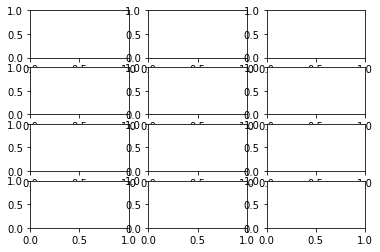

In [36]:
plt.figure(figsize=(12, 4)) 
fig, ax = plt.subplots(4, 3)

# ax[0, 0].plot(x, y1)
# ax[0, 1].plot(x, y2)
# ax[1, 0].plot(x, y3)
# ax[1, 1].plot(x,y4)

# ax[0, 0].set_title("Sine function")
# ax[0, 1].set_title("Cosine function")
# ax[1, 0].set_title("Sigmoid function")
# ax[1, 1].set_title("Exponential function")
# plt.subplot(131)
ratio = IRON_TOP_mean[2:7]
labels = IRON_TOP_mean[2:7].index
plt.title("IRON_TOP")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.subplot(132)
ratio = BRONZE_TOP_mean[2:7]
labels = BRONZE_TOP_mean[2:7].index
plt.title("BRONZE_TOP")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.subplot(133)
ratio = SILVER_TOP_mean[2:7]
labels = SILVER_TOP_mean[2:7].index
plt.title("SILVER_TOP")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.subplot(231)
ratio = SILVER_TOP_mean[2:7]
labels = SILVER_TOP_mean[2:7].index
plt.title("SILVER_TOP")
plt.pie(ratio, labels=labels, autopct='%.1f%%')

In [37]:
ratio = CHALLENGER_TOP_mean[2:7]
labels = CHALLENGER_TOP_mean[2:7].index
plt.title("GOLD_TOP")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

NameError: name 'CHALLENGER_TOP_mean' is not defined

In [38]:
Tier = ['IRON', 'BRONZE', 'SLIVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRAND_MASTER','CHALLENGER', 'ABOVE_MASTER']
line = ['TOP', 'JUG', 'MID', 'AD', 'SUP']
for j in line:
    globals()[f'{j}_w_difficulty'] = []
    for i in tier:
        globals()[f'{j}_w_difficulty'].append(globals()[f'{i}_{j}_w_mean'][0]) 

In [39]:
JUG_w_difficulty

[1.7501805054151622,
 1.887849132080863,
 2.038059172887267,
 2.2420387305002687,
 2.3687873416059353,
 2.4343646740762988,
 2.504784688995215,
 2.2420387305002687,
 2.4117647058823524,
 3.0]

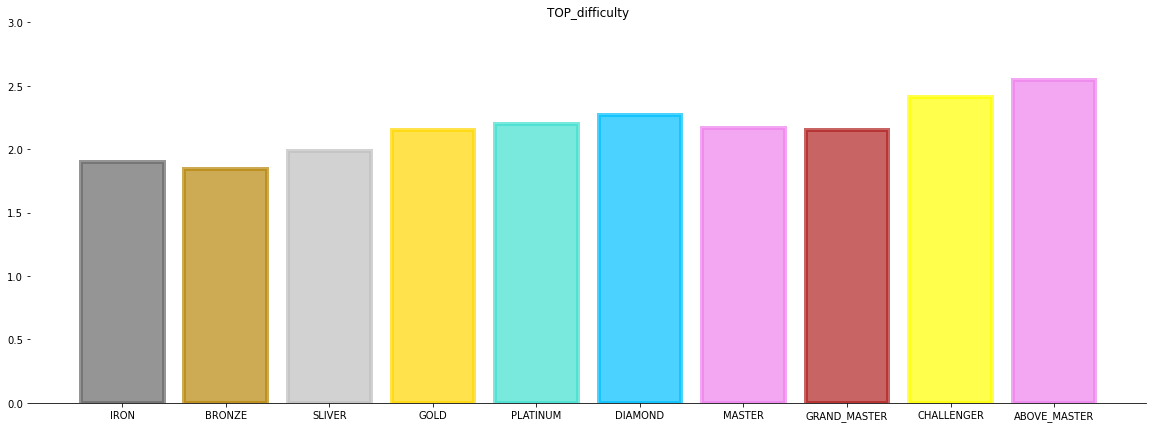

In [48]:
colors = ['dimgray', 'darkgoldenrod', 'silver', 'gold', 'turquoise', 
          'deepskyblue', 'violet', 'firebrick', 'yellow', 'violet']

plt.figure(figsize= (20, 7))
plt.bar(Tier, TOP_w_difficulty, color = colors, edgecolor = colors, alpha = 0.7, linewidth = 4)
plt.title("TOP_difficulty")

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.ylim(0,3)
plt.show()

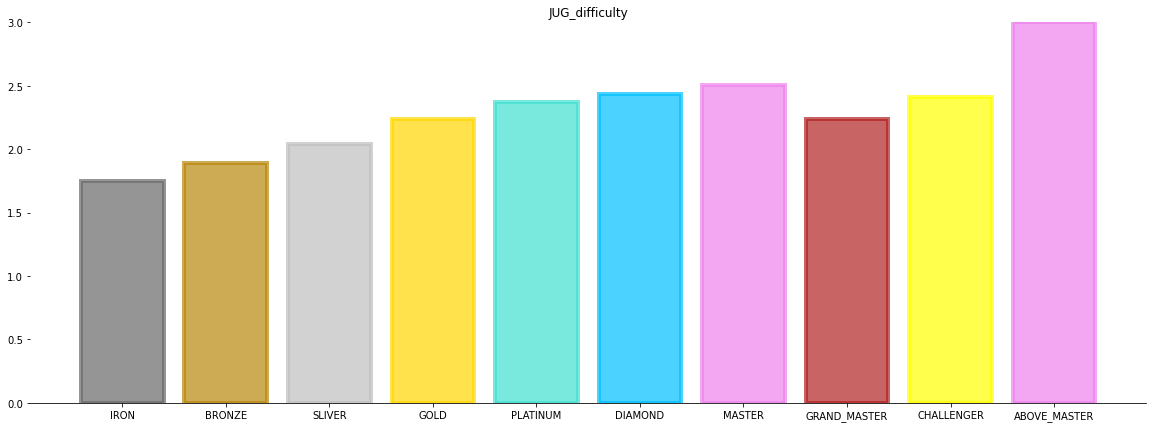

In [43]:
colors = ['dimgray', 'darkgoldenrod', 'silver', 'gold', 'turquoise', 
          'deepskyblue', 'violet', 'firebrick', 'yellow', 'violet']

plt.figure(figsize= (20, 7))
plt.bar(Tier, JUG_w_difficulty, color = colors, edgecolor = colors, alpha = 0.7, linewidth = 4)
plt.title("JUG_difficulty")

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.ylim(0,3)
plt.show()

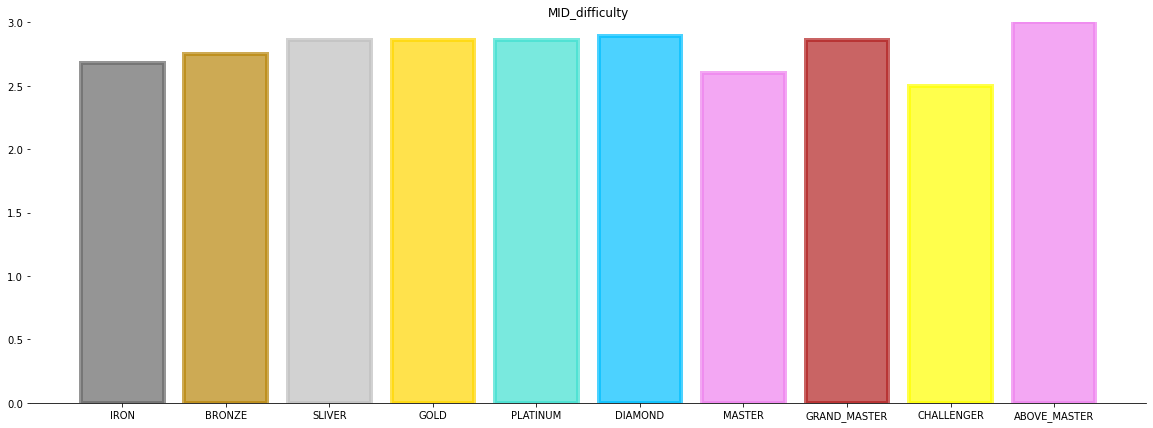

In [45]:
colors = ['dimgray', 'darkgoldenrod', 'silver', 'gold', 'turquoise', 
          'deepskyblue', 'violet', 'firebrick', 'yellow', 'violet']

plt.figure(figsize= (20, 7))
plt.bar(Tier, MID_w_difficulty, color = colors, edgecolor = colors, alpha = 0.7, linewidth = 4)
plt.title("MID_difficulty")

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.ylim(0,3)
plt.show()

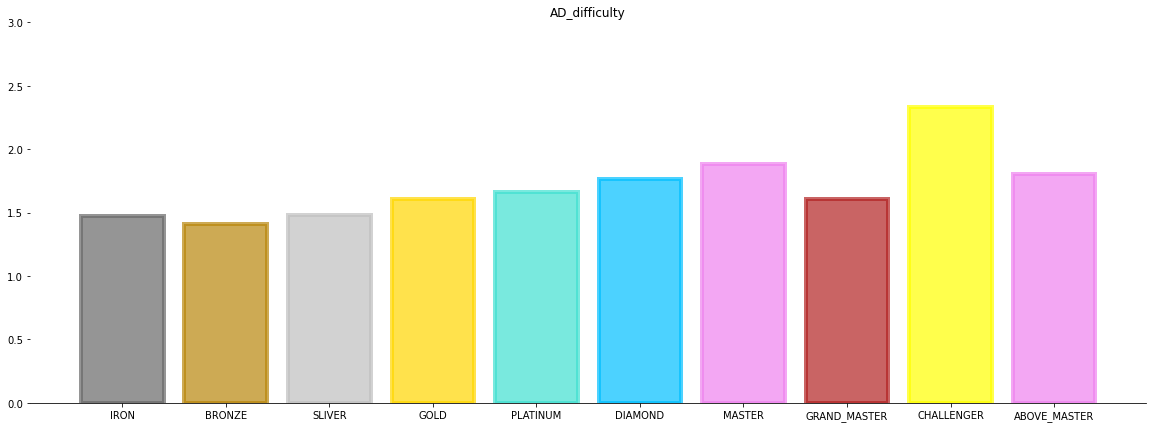

In [46]:
colors = ['dimgray', 'darkgoldenrod', 'silver', 'gold', 'turquoise', 
          'deepskyblue', 'violet', 'firebrick', 'yellow', 'violet']

plt.figure(figsize= (20, 7))
plt.bar(Tier, AD_w_difficulty, color = colors, edgecolor = colors, alpha = 0.7, linewidth = 4)
plt.title("AD_difficulty")

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.ylim(0,3)
plt.show()

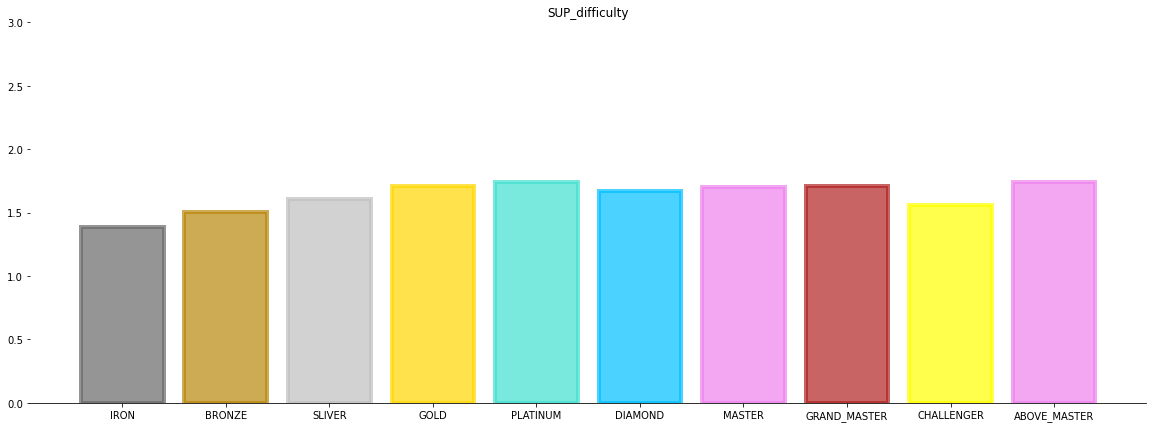

In [47]:
colors = ['dimgray', 'darkgoldenrod', 'silver', 'gold', 'turquoise', 
          'deepskyblue', 'violet', 'firebrick', 'yellow', 'violet']

plt.figure(figsize= (20, 7))
plt.bar(Tier, SUP_w_difficulty, color = colors, edgecolor = colors, alpha = 0.7, linewidth = 4)
plt.title("SUP_difficulty")

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.ylim(0,3)
#plt.ylim(1,2)
plt.show()